# Schaff Trend Cycle (STC)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.trend import STCIndicator

In [89]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [94]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "stc_"
    for w in windows:
        wf = w*2
        ws = wf*2
        i = STCIndicator(df.close, wf, ws, w)
        sma_name = name + str(w)
        df[sma_name] = i.stc()

#         df[sma_name + "_diff"] = list(map(lambda s, c: uf.none_subtraction(s, c), df[sma_name], df.close))
#         df[sma_name + "_diff_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_diff"]))
#         df[sma_name + "_diff_o_close"] = list(map(lambda s, c: s/c, df[sma_name + "_diff"], df.close))
#         df[sma_name + "_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df[sma_name + "_diff_o_close"]))
#         df[sma_name + "_rate"] = uf.get_rate(df[sma_name])
# #         df[sma_name + "_rate_o_close"] = list(map(lambda r, c: r/c, df[sma_name + "_rate"], df.close))
#         df[sma_name + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_rate"]))
# #         df[sma_name + "_diff_o_close_rate"] = uf.get_rate(df[sma_name + "_diff_o_close"])
        
        
        

In [95]:
variations([50])

In [96]:
indicators = list(df.columns)[13:]
indicators.append("target")
len(indicators)

2

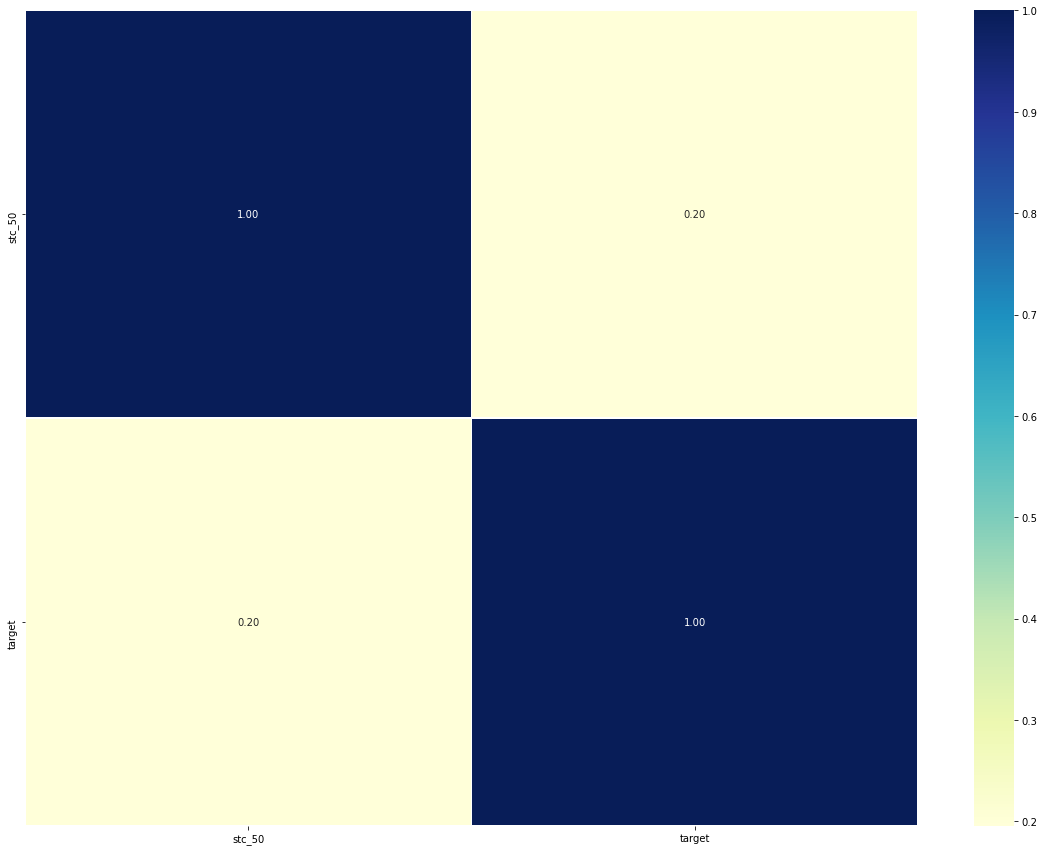

In [97]:
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

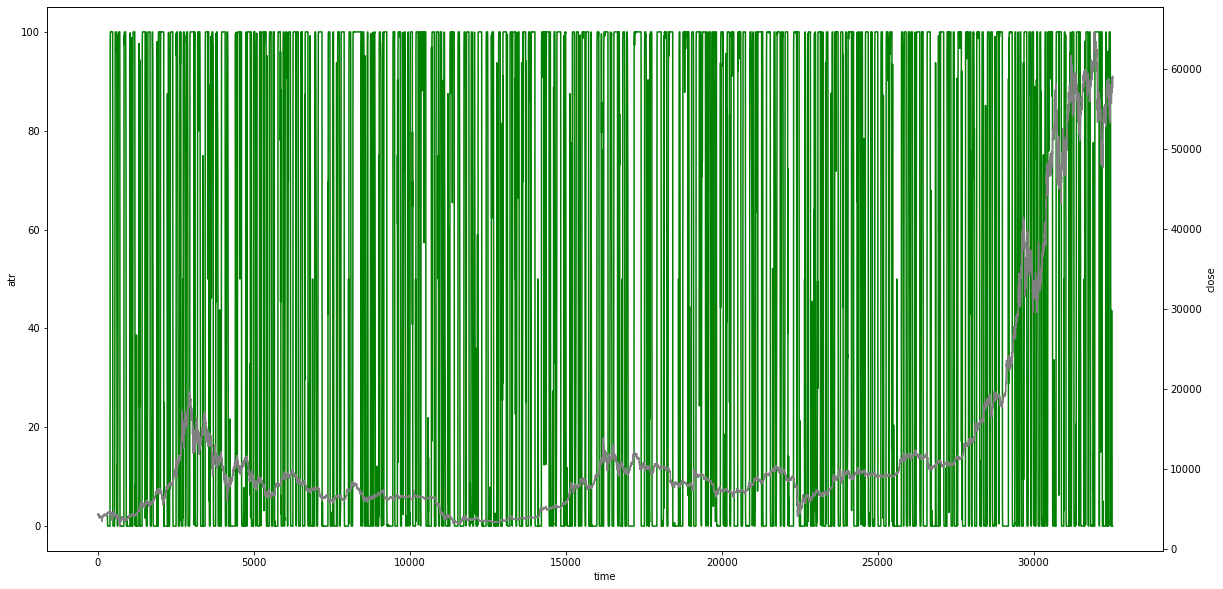

In [84]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df["stc_50"],
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [71]:
df[300:]

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,target,stc_50
300,2017-08-29 16:00:00.000,4569.65,4584.00,4503.92,4503.92,30.890227,1504025999999,1.402143e+05,169,2.584557,1.180726e+04,11116.500606,0,NaN
301,2017-08-29 17:00:00.000,4505.00,4555.55,4496.95,4555.55,36.100730,1504029599999,1.633941e+05,197,4.554864,2.071684e+04,11094.260706,0,2.073149
302,2017-08-29 18:00:00.000,4533.47,4555.54,4511.45,4536.63,25.692199,1504033199999,1.164845e+05,164,5.247023,2.386368e+04,11107.234011,0,1.295718
303,2017-08-29 19:00:00.000,4536.64,4555.55,4521.01,4555.55,34.531074,1504036799999,1.567857e+05,221,13.471590,6.129003e+04,11051.798092,0,0.777431
304,2017-08-29 20:00:00.000,4540.00,4597.00,4535.09,4577.54,13.587935,1504040399999,6.209341e+04,97,5.260459,2.409766e+04,11054.316026,0,0.453501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494,2843.709612,1.656895e+08,0.000000,0,0.006019
32532,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969,2172.633797,1.262157e+08,0.000000,0,0.005182
32533,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370,1870.545827,1.098718e+08,0.000000,0,0.002835
32534,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800,1551.876404,9.167612e+07,0.000000,0,0.001417
